<a href="https://colab.research.google.com/github/VitaT/DM-course-2019/blob/master/11_16practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

We will start with superwised learning

simple regression:
$$\hat{y}= w_0 + w_1 x_1$$
as a reminder -- multivariate regression:
$$\hat{y}= w_0 + w_1 x_1 + ... + w_p x_p$$

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
# https://matplotlib.org/api/index.
# https://numpy.org/doc/stable/
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

plt.style.use('seaborn-whitegrid')

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# about the dataset: https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

# First, we will Use only one feature -- body mass index
# all predictors are scalled
diabetes_X_bmi = diabetes_X[:, np.newaxis, 2]


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_bmi, diabetes_y)

# coeficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficients: \n', w_bmi)
print('Intercept: \n', i_bmi)

Coefficients: 
 [949.43526038]
Intercept: 
 152.1334841628967


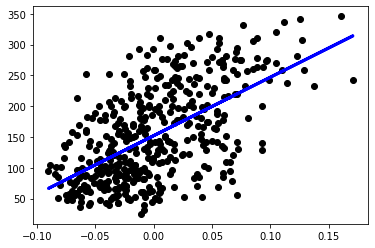

In [ ]:
# plot
plt.scatter(diabetes_X_bmi, diabetes_y,  color='black')
plt.plot(diabetes_X_bmi, i_bmi + w_bmi * diabetes_X_bmi, color='blue', linewidth=3)
plt.show()

In [ ]:
# how good is the fit?
# R^2
regr.score(diabetes_X_bmi, diabetes_y)

# MSE -- mean square error
diabetes_y_pred = regr.predict(diabetes_X_bmi)
((diabetes_y - diabetes_y_pred) ** 2).mean()
mean_squared_error(diabetes_y, diabetes_y_pred)

0.3439237602253803

Mean squared error
$$ MSE = \frac{1}{n}\Sigma_{i = 1}^{n}{(y_{i} - \hat{f}(x_{i}))^2}$$ 

Residual sum of squares
$$ RSS = \Sigma_{i = 1}^{n}(y_{i} - \hat{y}_{i})^2 $$

Residual standard error
$$ RSE = \sqrt{\frac{1}{n-p - 1}\Sigma_{i = 1}^{n}{(y_{i} - \hat{y}_{i})^2}}$$ 

RSE and MSA are hard to interpret, because it depends on the y variable scale
         
$R^2$ can take values from 0 to 1 (can be interpreted as proportion of variance explained)

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

where TTS (total sum of squares) is 
$$TSS = \Sigma_{i = 1}^{n}{(y_{i} - \bar{y})}$$
TTS can be thought of as the amount variability inherent in the response before the regression is performed.

Text(0, 0.5, 'dependent variable - disease progression')

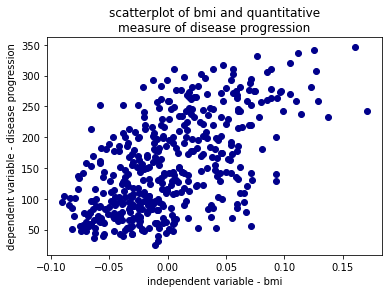

In [ ]:
# scatter plot between out dependent and independent variables
plt.plot(diabetes_X_bmi, diabetes_y, 'o', color='darkblue')
plt.title("scatterplot of bmi and quantitative\nmeasure of disease progression")
plt.xlabel("independent variable - bmi")
plt.ylabel("dependent variable - disease progression")

Text(0, 0.5, 'dependent variable - disease progression')

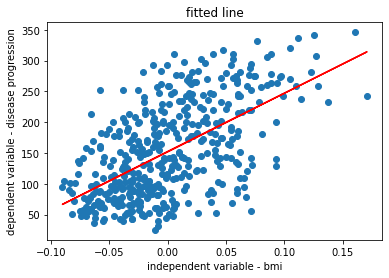

In [ ]:
#  scatter plot and our fitted line
plt.scatter(diabetes_X_bmi, diabetes_y)
plt.plot(diabetes_X_bmi, diabetes_y_pred, color = "red")
plt.title("fitted line")
plt.xlabel("independent variable - bmi")
plt.ylabel("dependent variable - disease progression")

Text(0, 0.5, 'dependent variable - disease progression')

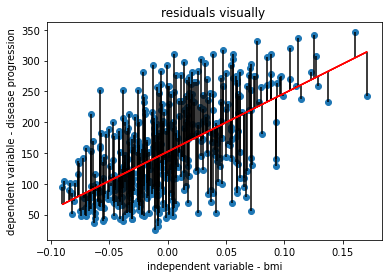

In [ ]:
plt.plot(diabetes_X_bmi, diabetes_y_pred, color = "red")
plt.scatter(diabetes_X_bmi, diabetes_y)
plt.vlines(diabetes_X_bmi, diabetes_y_pred, diabetes_y)
plt.title("residuals visually ")
plt.xlabel("independent variable - bmi")
plt.ylabel("dependent variable - disease progression")

Text(0, 0.5, 'Residual')

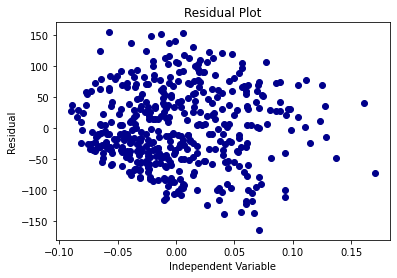

In [ ]:
# residuals plot
# we can use the independent variable X as x axis, as we used only a single variable for prediction
residuals = diabetes_y - diabetes_y_pred
plt.plot(diabetes_X_bmi, residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

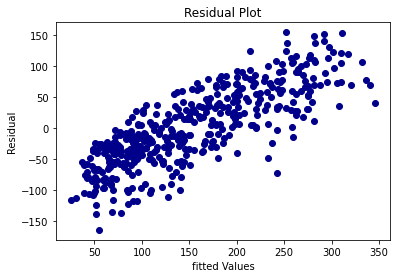

In [ ]:
# residual plot
# When we use multiple regression and have more than one predictor, it is common to use predicted y values for x axis
plt.plot(diabetes_y, residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("fitted Values")
plt.ylabel("Residual")

Text(0, 0.5, 'predicted y values')

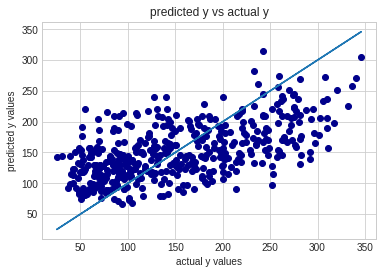

In [ ]:
# to understand what is happening it is usefull to plot actual vs predicted y values.
plt.plot(diabetes_y, diabetes_y_pred, 'o', color='darkblue')
plt.plot(diabetes_y, diabetes_y)
plt.title("predicted y vs actual y")
plt.xlabel("actual y values")
plt.ylabel("predicted y values")

some examples of residual plots:


![some examples of residual plots](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)



(a) Unbiased and homoscedastic. The residuals average to zero in each thin verical strip and the SD is the same all across the plot.

(b) Biased and homoscedastic. The residuals show a linear pattern, probably due to a lurking variable not included in the experiment.

(c) Biased and homoscedastic. The residuals show a quadratic pattern, possibly because of a nonlinear relationship. Sometimes a variable transform will eliminate the bias.

(d) Unbiased, but homoscedastic. The SD is small to the left of the plot and large to the right: the residuals are heteroscadastic.

(e) Biased and heteroscedastic. The pattern is linear.

(f) Biased and heteroscedastic. The pattern is quadratic.

(g) situation -- Outliers:

<img src="https://www.qualtrics.com/support/wp-content/uploads/2017/07/Screen-Shot-2017-07-19-at-1.08.55-PM.png" alt="Drawing" width="350"/>

<img src="https://www.qualtrics.com/support/wp-content/uploads/2017/07/Screen-Shot-2017-07-19-at-1.00.46-PM.png" alt="Drawing" width="350"/>

h) situation -- large Y axis datapoints. Likely you have some missing variables:

<img src="https://www.qualtrics.com/support/wp-content/uploads/2017/07/Screen-Shot-2017-07-19-at-9.57.10-AM.png" alt="Drawing" width="400"/>

plots taken from:

<https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/>

<https://condor.depaul.edu/sjost/it223/documents/regress.htm>

Text(0, 0.5, 'frequency')

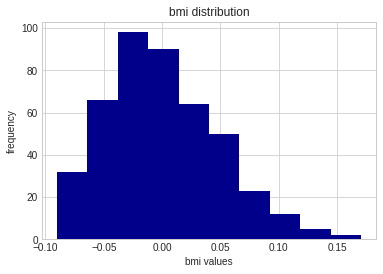

In [ ]:
# some more plots to understand data
plt.hist(diabetes_X_bmi, color='darkblue')
plt.title("bmi distribution")
plt.xlabel("bmi values")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

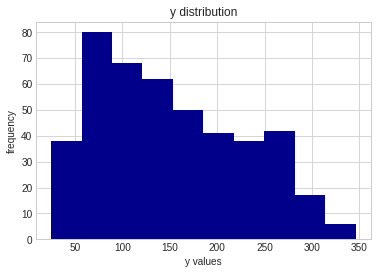

In [ ]:
plt.hist(diabetes_y, color='darkblue')
plt.title("y distribution")
plt.xlabel("y values")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

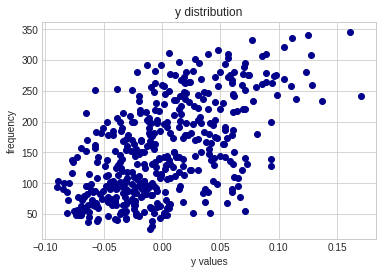

In [ ]:
plt.scatter(diabetes_X_bmi, diabetes_y, color='darkblue')
plt.title("y distribution")
plt.xlabel("y values")
plt.ylabel("frequency")

Here we decided what our model will be before we contructed it.    
We decided that we will use linear regression and only a single predictor. We made the model, evaluated it. That's all.     

One of the main goals of regression and classification is **PREDICTION**     
(the other would be interpretability)

We want to predict what would be the values of Y, using only our model and all the predictors (unseen data X).

And we want our model to perform on the unseen data well. 

Here, however, we used up all our data and cannot evaluate how well our model would perform on unseen data. We can only trust our evaluations derived from training set i.e. all the data (we trained model using all dataset).

Let's leave out a chunk of our data and train model only on part of the data. Then we can use those left out values (that were unseen for the model) to evaluate the performance the model on the new, unseen data.


Coefficient: 938.24
Intercept: 152.92
Test Mean squared error: 2548.07
Test R-squared: 0.47
Train Mean squared error: 3955.02
Train R-squared: 0.34


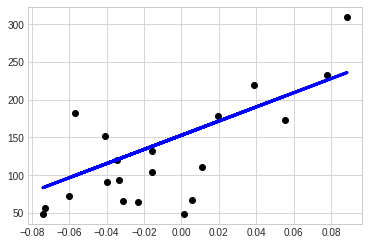

In [123]:

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_bmi[:-20]
diabetes_X_test = diabetes_X_bmi[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient: %.2f'% w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
train_diabetes_y_pred = regr.predict(diabetes_X_train)
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)


Coefficient: 945.75
Intercept: 152.72
Test Mean squared error: 3864.93
Test R-squared: 0.36
Train Mean squared error: 3901.98
Train R-squared: 0.34


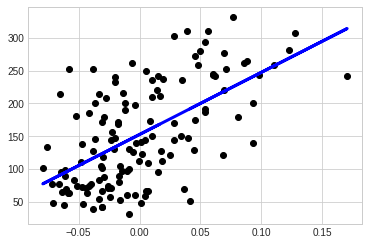

In [127]:
# better yet -- use a function that randomly selects observations over all dataset
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = model_selection.train_test_split(diabetes_X_bmi, diabetes_y, test_size = 0.3)
# let's check if the number of observations is ok in train and test sets
diabetes_X_train.shape
diabetes_y_train.shape
diabetes_X_test.shape
diabetes_y_test.shape


# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
train_diabetes_y_pred = regr.predict(diabetes_X_train)

# The coefficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient: %.2f'% w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)



Coefficient: 988.42
Intercept: 151.04
Test Mean squared error: 3884.94
Test R-squared: 0.28
Train Mean squared error: 3899.45
Train R-squared: 0.37


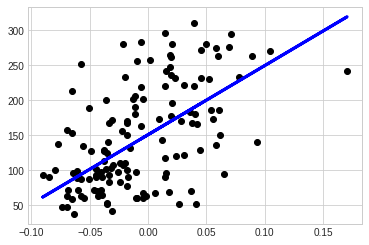

In [131]:
# better yet -- use a function that randomly selects observations over all dataset
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = model_selection.train_test_split(diabetes_X_bmi, diabetes_y, test_size = 0.3, random_state = 42)
# let's check if the number of observations is ok in train and test sets
diabetes_X_train.shape
diabetes_y_train.shape
diabetes_X_test.shape
diabetes_y_test.shape


# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
train_diabetes_y_pred = regr.predict(diabetes_X_train)

# The coefficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient: %.2f'% w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)



we see that our results depend on our training and testing dataset. It's quality, complexity, amount... 

So our data has some characteristics. The process we want to model can be linear or follow a quadratic, logistic, sine wave function... or a very complex irregular function. 

Our models also vary in their plasticity -- do they allow only linear divisional lines or more wiggly lines. 

Some examples of ML methods by their flexibility

![](https://drive.google.com/uc?id=1ALdl6q_Ldku-u_-26X0trxli7S9YwXem)

However, for all methods we can adjust some parameters that increase or decrease their plexibility.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = model_selection.train_test_split(diabetes_X_bmi, diabetes_y, test_size = 0.3, random_state = 42)
# let's check if the number of observations is ok in train and test sets
diabetes_X_train.shape
diabetes_y_train.shape
diabetes_X_test.shape
diabetes_y_test.shape

# let's use polynomial regresion instead of linear, with X**2
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(diabetes_X_train) 
X_poly_test = poly_features.fit_transform(diabetes_X_test) 
poly_features.fit(X_poly_train, diabetes_y_train)

# Linear regression fit
regr = linear_model.LinearRegression()
regr.fit(X_poly_train, diabetes_y_train)
diabetes_y_pred = regr.predict(X_poly_test)
train_diabetes_y_pred = regr.predict(X_poly_train)

# The coefficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient:')
print(w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))

In [207]:
# let's use more than one predictor
diabetes_X_two = diabetes_X[:, 2:4]

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = model_selection.train_test_split(diabetes_X_two, diabetes_y, test_size = 0.3, random_state = 42)
# let's check if the number of observations is ok in train and test sets
diabetes_X_train.shape
diabetes_y_train.shape
diabetes_X_test.shape
diabetes_y_test.shape


# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
train_diabetes_y_pred = regr.predict(diabetes_X_train)

# The coefficients
w_bmi = regr.coef_
i_bmi = regr.intercept_
print('Coefficient:')
print(w_bmi)
print('Intercept: %.2f'% i_bmi)
# Test dataset evaluation:
print('Test Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Test R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# train dataset evaluation:
print('Train Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, train_diabetes_y_pred))
print('Train R-squared: %.2f' % r2_score(diabetes_y_train, train_diabetes_y_pred))


Coefficient:
[830.44451652 411.25661013]
Intercept: 150.98
Test Mean squared error: 3631.74
Test R-squared: 0.33
Train Mean squared error: 3568.42
Train R-squared: 0.42


Therefore we can change some parameters for the same model (hyperparameters). We can ajust them to make out model more or less flexible.

Here we meet one of the main challanges for predictive modeling (and modeling in general) -- what model to choose? to use?

If we choose very rigid model -- it miss the pattern and underfit.
If we choose very flexible model -- we model the noise and overfit.

![](https://miro.medium.com/max/512/1*_7OPgojau8hkiPUiHoGK_w.png)


Even using single predictor we can change our model.
Linear models are quite rigid and therefore not likely to overfit.
But we can still overfit data with linear model if we include too many predictors.

Generally we want to test ourselfves if we overfit and that is usually done by evaluating train and test errors.

![s](https://drive.google.com/uc?id=1J8LdQIqheL7PZKLLrIzl-2UvHMuamPWe)



# Exercise

Fit a regression model for diabetes data. Try linear regression models, select the one that you think fits the best

In [ ]:
# your code and notes :) or you can start your own notebook